# Module 9 Lab Assignment

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In this lab, you will work a dataset that belongs to a MOOC. The dataset contains the following columns:

* **StudentId**: Id of the student
* **Age**: The age of the student
* **Education**: The education level of the student. 1: Highschool, 2: Undergrad, 3: Master, 4: PhD.
* **Exam1**: First midterm score [ranges between 0 to 100]
* **Exam2**: Second midterm score [ranges between 0 to 100]
* **Final**: Final exam score [ranges between 0 to 100]
* **Discussion**: Number of discussion posts
* **Tutorial**: Number of visits to tutorial pages
* **Video**: Number of views of course videos
* **Assignment**: Number of assignments submitted [ranges between 0 to 4].

**TASK#1:** Import the data into a dataframe called `data`, and display the top 3 columns:

`[+3]`

In [ ]:
data = pd.read_excel("student-data.xlsx")
data.head(3)

,StudentId,Age,Education,Exam1,Exam2,Final,Discussion,Tutorial,Video,Assignment
0,10,23,1,45.0,55,60.0,1,16,13,2
1,72,16,1,65.0,33,40.0,3,5,7,2
2,82,17,1,68.0,48,35.0,3,8,20,2


**TASK#2:** There are some missing values in some columns. Display the count of missing values per each column. 

The output should look like this:

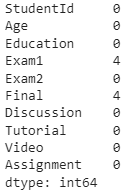

`[+3]`

In [ ]:
data.isna().sum()

StudentId     0
Age           0
Education     0
Exam1         4
Exam2         0
Final         4
Discussion    0
Tutorial      0
Video         0
Assignment    0
dtype: int64

**TASK#3:** Fill the missing values in `Exam1` column with the average `Exam1` of the `Education` level that the student belongs to. 

For example, assume that student A's `Exam1` score is unknown. This student's education level is *Higher Education*. Then, the `Exam1` score of this student should be set to the average `Exam1` score of all students from *Higher Education*. 

`[+10]`

In [ ]:
#I used this method, but solving this problem by groupby method is also possible.
educ_lev = data['Education'].values.tolist()
educ_lev = list(set(educ_lev))
for id in educ_lev:  
  datass = data[data['Education']==id]
  average = datass['Exam1'].mean(skipna=True)
  #HINT: video_data['Count'].mean() will return the average of all count values. 
  #But you need the average/mean only for a specific student at each iteration.
  #That is, before .mean(), you need to filter video_data based on id.
  idss = data[data.isnull().any(axis=1)]
  idss = idss[idss['Education']==id]
  idss = idss.index
  #Now you can use the average value to fill the missing Count values for the student (at each iteration)
  #The second statement below (video_data.loc) does this. But, before that you need to define selectingRows properly.
  selectingRows = list(idss)#HINT: Select the rows (where Count is NA) and StudentId is equal to id.
  data.loc[selectingRows, 'Exam1'] = average
data = data.round(1)
data

,StudentId,Age,Education,Exam1,Exam2,Final,Discussion,Tutorial,Video,Assignment
0,10,23,1,45.0,55,60.0,1,16,13,2
1,72,16,1,65.0,33,40.0,3,5,7,2
2,82,17,1,68.0,48,35.0,3,8,20,2
3,83,20,1,29.0,24,42.0,2,20,13,3
4,93,24,1,54.0,37,61.0,0,5,10,4
...,...,...,...,...,...,...,...,...,...,...
703,646,54,4,74.0,82,96.0,10,10,11,3
704,650,53,4,94.0,86,72.0,15,13,24,3
705,683,46,4,82.0,78,78.0,8,19,27,3
706,684,49,4,89.0,80,95.0,9,12,39,3


In [ ]:
data.isna().sum()

StudentId     0
Age           0
Education     0
Exam1         0
Exam2         0
Final         4
Discussion    0
Tutorial      0
Video         0
Assignment    0
dtype: int64

**TASK#4:** Fill the missing values in `Final` column with the student's average score in `Exam1` and `Exam2`. In this task the education level does not matter.

HINT: You can simply use `fillna` method on `Final` column (no `apply` or `lambda` function is necessary).

`[+8]`

In [ ]:
data['Final'].fillna(value = (data['Exam1']+data['Exam2'])/2, inplace=True)
data

,StudentId,Age,Education,Exam1,Exam2,Final,Discussion,Tutorial,Video,Assignment
0,10,23,1,45.0,55,60.0,1,16,13,2
1,72,16,1,65.0,33,40.0,3,5,7,2
2,82,17,1,68.0,48,35.0,3,8,20,2
3,83,20,1,29.0,24,42.0,2,20,13,3
4,93,24,1,54.0,37,61.0,0,5,10,4
...,...,...,...,...,...,...,...,...,...,...
703,646,54,4,74.0,82,96.0,10,10,11,3
704,650,53,4,94.0,86,72.0,15,13,24,3
705,683,46,4,82.0,78,78.0,8,19,27,3
706,684,49,4,89.0,80,95.0,9,12,39,3


In [ ]:
data.isna().sum()

StudentId     0
Age           0
Education     0
Exam1         0
Exam2         0
Final         0
Discussion    0
Tutorial      0
Video         0
Assignment    0
dtype: int64

**TASK#5:** In this task, you need to replace the values in `Education` column with proper labels, given in the following dictionary:

`educationDict = { 1: '1.Highschool', 2:'2.Undergrad', 3:'3.Master', 4:'4.PhD' }`

In [ ]:
educationDict = {1: '1.Highschool', 2:'2.Undergrad', 3:'3.Master', 4:'4.PhD'}

Now, pass this dictionary into `replace` function, to update the values in the `Education` column:

`[+5]`

In [ ]:
data['Education'] = data['Education'].replace(educationDict)
data

,StudentId,Age,Education,Exam1,Exam2,Final,Discussion,Tutorial,Video,Assignment
0,10,23,1.Highschool,45.0,55,60.0,1,16,13,2
1,72,16,1.Highschool,65.0,33,40.0,3,5,7,2
2,82,17,1.Highschool,68.0,48,35.0,3,8,20,2
3,83,20,1.Highschool,29.0,24,42.0,2,20,13,3
4,93,24,1.Highschool,54.0,37,61.0,0,5,10,4
...,...,...,...,...,...,...,...,...,...,...
703,646,54,4.PhD,74.0,82,96.0,10,10,11,3
704,650,53,4.PhD,94.0,86,72.0,15,13,24,3
705,683,46,4.PhD,82.0,78,78.0,8,19,27,3
706,684,49,4.PhD,89.0,80,95.0,9,12,39,3


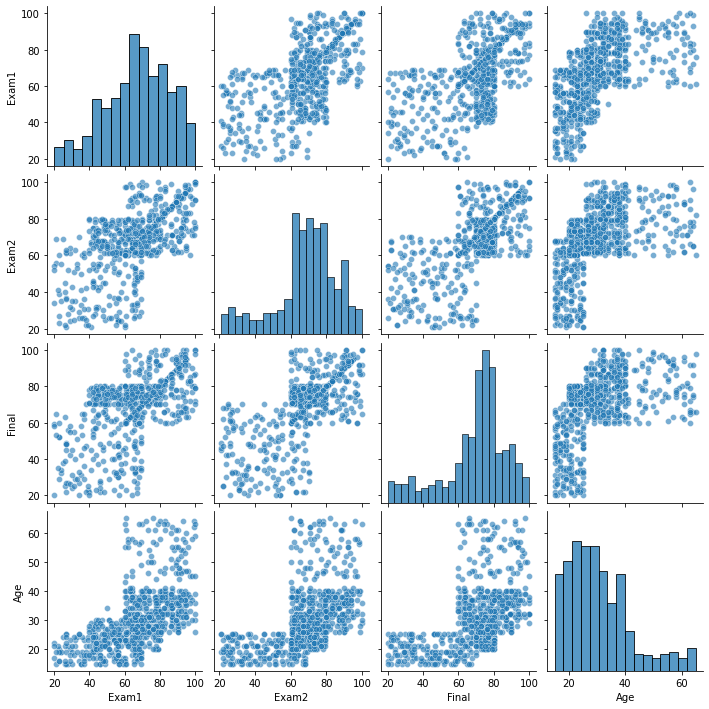

In [ ]:
sns.pairplot(data[['Exam1', 'Exam2', 'Final', 'Age']], 
             diag_kind='hist', plot_kws={'alpha': 0.6})

The scatter plot matrix gives us very detailed information. For example, from age and exam1 scatter plot, we can see that as age increases, the exam 1 scores are getting better.

**TASK#6:** Now, we are interested in if there is a difference in exam performances depending on the education level. 

Please use `groupby` to compute the average scores of *Exam1*, *Exam2*, and *Final* for each `Education` level. 

`[+8]`

In [ ]:
average_of_final = data['Final'].groupby(data['Education'])
average_of_final = average_of_final.mean()
average_of_exam1 = data['Exam1'].groupby(data['Education'])
average_of_exam1 = average_of_exam1.mean()
average_of_exam2 = data['Exam2'].groupby(data['Education'])
average_of_exam2 = average_of_exam2.mean()
#print("Average score of Exam1", average_of_exam1)
#print("Average score of Exam2", average_of_exam2)
#print("Average score of Final", average_of_final)
frames = [average_of_exam1, average_of_exam2, average_of_final]
df = pd.concat(frames, axis = 1)
df

,Exam1,Exam2,Final
Education,,,
1.Highschool,47.737209,44.912791,44.739535
2.Undergrad,60.062570,70.402235,75.033799
3.Master,78.534946,78.720430,78.639785
4.PhD,80.476608,79.228070,79.752924


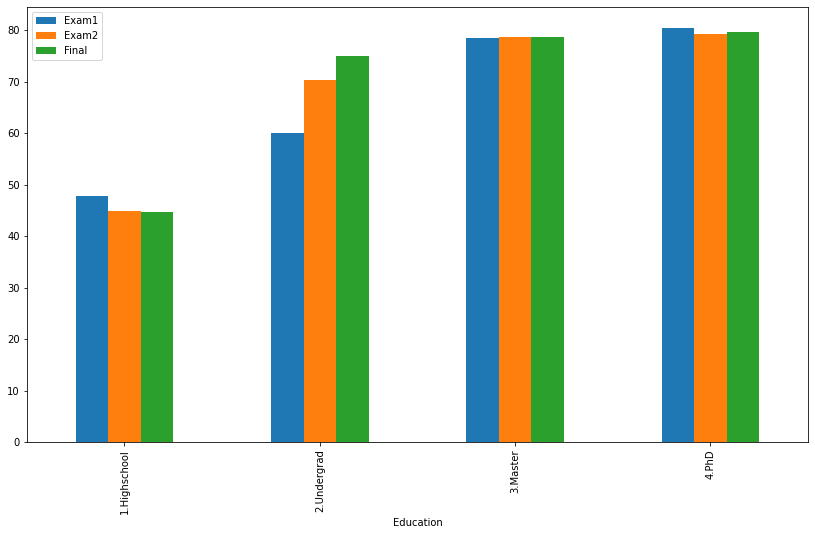

In [ ]:
df.plot.bar(figsize=(14, 8))

Bar graph very clearly presents the grades of students from variuous education levels. We can observe that, high school student's performance is getting worse from exam1 to the final. On the contrary, undergraduate student's performance is getting better. The performance of master and phd students overall is same in all three exam.

**TASK#7**: Based on the dataset obtained in the previous task, please find for which Education level there is an increase in the average scores from Exam1 to Exam2 and from Exam2 to Final.

Here, you can utilize `pct_change` function.

The output of your code should look like this:

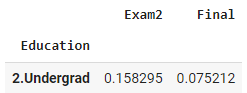
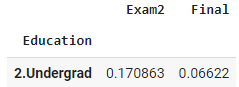

`[+12]`

In [ ]:
df1 = df.pct_change(axis='columns')
df1 = df1[df1>0]
df1 = df1.dropna(axis='columns', how = 'all')
df1 = df1.dropna(axis='rows', how = 'any')
df1

,Exam2,Final
Education,,
2.Undergrad,0.172148,0.065787


**TASK#8:** The `Assignment` column indicates the number of submissions submitted by the students (between 0-4). It is expected that students who submit their assignments will show better performance in the final exam.

To explore this relationship, please compute the average `Final` grade for each distinct value of `Assignment` column.

Make a one-sentence comment about the relationship between the number of assignments submitted and the final scores.

`[+7]`

In [ ]:
average_of_final_for_each_assignment = data['Final'].groupby(data['Assignment'])
average_of_final_for_each_assignment = average_of_final_for_each_assignment.mean()
#average_of_final_for_each_assignment = pd.DataFrame(average_of_final_for_each_assignment)
average_of_final_for_each_assignment

Assignment
0    47.675000
1    62.755612
2    71.622895
3    74.575916
4    71.331217
Name: Final, dtype: float64

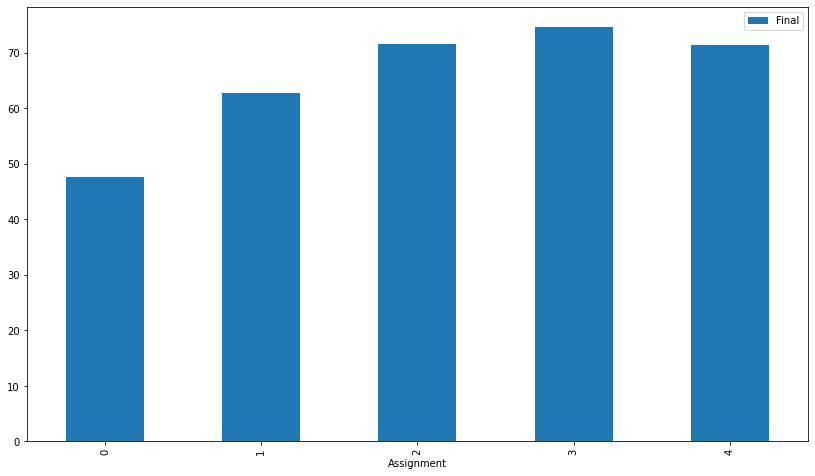

In [ ]:
average_of_final_for_each_assignment.plot.bar(figsize=(14, 8))

As can be seen from the line graph, as the number of submitted assignments increases, so does the final grade. This means that assignments positively affect the student's preparation. On the other hand, if we look carefully, we can observe that it has a negative effect when the number of submissions is 4. This can be explained by the fact that these students spend a lot of time completing assignments and cannot prepare well for the final. In addition, we need to point out that the Peak grade is occurs when the number of submissions is 3.

Text(3, 77.57591623036649, 'Peak Success')

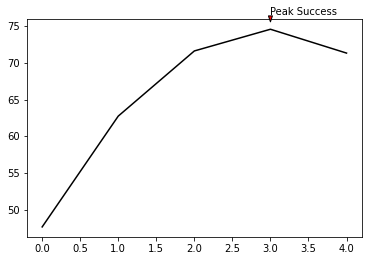

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

data = average_of_final_for_each_assignment
nUniWinners = data['Final']

ax.plot(nUniWinners, 'k-')
ax.annotate('Peak Success',
            xy = (3, nUniWinners.asof(3) +1),
            xytext = (3, nUniWinners.asof(3) + 3),
            arrowprops=dict(facecolor='red', headwidth=4, width=2, headlength=6),
            horizontalalignment='left', verticalalignment='top')

As can be seen from the line graph, as the number of submitted assignments increases, so does the final grade. This means that assignments positively affect the student's preparation. On the other hand, if we look carefully, we can observe that it has a negative effect when the number of submissions is 4. This can be explained by the fact that these students spend a lot of time completing assignments and cannot prepare well for the final. In addition, we need to point out that the Peak grade is occurs when the number of submissions is 3.

Text(0, 0.5, 'FinalAvg')

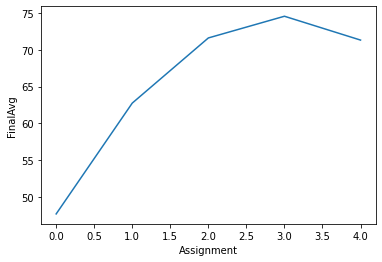

In [ ]:
plt.plot(average_of_final_for_each_assignment)
plt.xlabel('Assignment')
plt.ylabel('FinalAvg')

**TASK#9:** In this task, the goal is to construct a new dataframe that has two columns: 

* `ExamAvg` (the average of `Exam1`, `Exam2`, and `Final`)
* `Visits` (the average of the `Tutorial` and `Video` columns). 

You should use `groupby` function and pass a dictionary (possible called *mapping*) to this function.

Below is a sample view from the output:

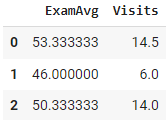

`[+8]`

In [ ]:
mapping = {'Exam1': 'ExamAvg', 'Exam2': 'ExamAvg', 'Final': 'ExamAvg',
          'Tutorial': 'Visits', 'Video': 'Visits'}
new_df = data.groupby(mapping, axis = 1)
new_df = new_df.mean()
new_df

,ExamAvg,Visits
0,53.333333,14.5
1,46.000000,6.0
2,50.333333,14.0
3,31.666667,16.5
4,50.666667,7.5
...,...,...
703,84.000000,10.5
704,84.000000,18.5
705,79.333333,23.0
706,88.000000,25.5


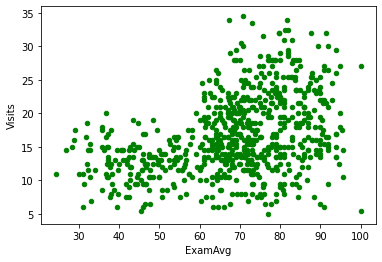

In [ ]:
new_df.plot.scatter(x = 'ExamAvg', y = 'Visits', c = 'g')


We can see that as the number of student visits to the tutorial and video increases, the exam average gets better.

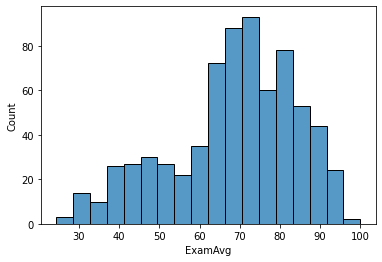

In [ ]:
sns.histplot(data=new_df['ExamAvg'])

The number of students scoring between 65 and 85 on the histogram is more common.

**TASK#10:** Create four bins (or buckets) from the existing data based on students' final grades. The lower-upper boundries for each bin are provided below, along with the labels:

* 0-59: Fails
* 60-69: Low Performers
* 70-84: Medium Performers
* 85-100: High Performers

The expected output is provided below:

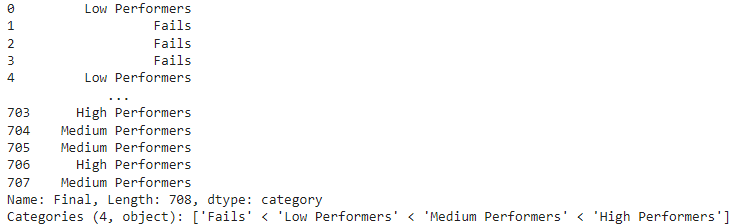

`[+9]`

In [ ]:
bins= [0, 59, 69, 84, 100]
Grades = ['Fails', 'Low Performers', 'Medium Performers', 'High Performers']
cats = pd.cut(data['Final'], bins, labels = Grades, right = False)
cats

0         Low Performers
1                  Fails
2                  Fails
3                  Fails
4         Low Performers
             ...        
703      High Performers
704    Medium Performers
705    Medium Performers
706      High Performers
707    Medium Performers
Name: Final, Length: 708, dtype: category
Categories (4, object): ['Fails' < 'Low Performers' < 'Medium Performers' < 'High Performers']

**TASK11:** Now, you need to display the number of students at the intersection of performance levels and education levels. We are interested in knowing the educationa levels of high performing students and low performing students.

You can use `crosstab` function. The output should look like this:

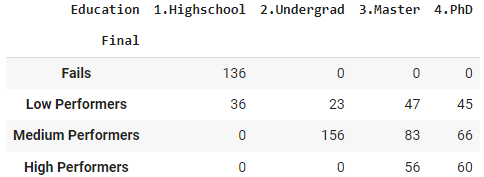

`[+9]`

In [ ]:
newest_frames = [data['Education'], cats]
newest_df = pd.concat(newest_frames, axis = 1)
pd.crosstab(newest_df.Final, newest_df.Education, margins=True)

Education,1.Highschool,2.Undergrad,3.Master,4.PhD,All
Final,,,,,
Fails,132,0,0,0,132
Low Performers,34,1,41,39,115
Medium Performers,6,178,82,66,332
High Performers,0,0,61,60,121
All,172,179,184,165,700


**TASK#12:** In the following several tasks, we are interested in exploring if students' age has any effect on their performance.

First, create a equal-length 4 buckets based on the ages of the students.

The output should look like this:

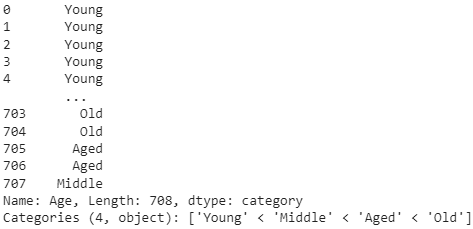

`[+9]`

In [ ]:
bins= [0, 30, 40, 50, 100]
ages = ['Young', 'Middle', ' Aged', 'Old']
arr = pd.cut(data['Age'], bins, labels = ages, right = False)
arr

0       Young
1       Young
2       Young
3       Young
4       Young
        ...  
703       Old
704       Old
705      Aged
706      Aged
707    Middle
Name: Age, Length: 708, dtype: category
Categories (4, object): ['Young' < 'Middle' < ' Aged' < 'Old']

**TASK13:** Next, group data based on age categories, and compute the followings:

* Exam1, Exam2: *Average*,
* Discussion	Tutorial	Video: *Average, Minimum value, and Maximum Value*

The output should look like this:

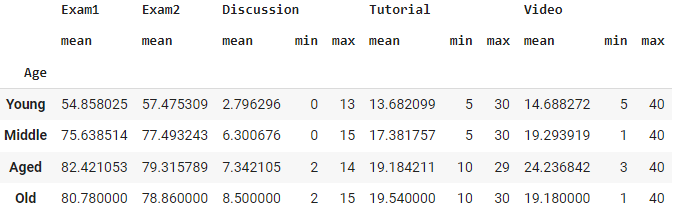

[+9]

In [ ]:
arr1 = data.drop(['StudentId', 'Assignment', 'Education', 'Age', 'Final'], axis=1)
arr1 = [arr1, arr]
arr1 = pd.concat(arr1 , axis = 1)
groupedd = arr1.groupby(['Age'])
result = groupedd.agg({'Exam1': 'mean', 'Exam2': 'mean', 'Discussion': ['mean', 'min', 'max'], 'Tutorial': ['mean', 'min', 'max'],
                      'Video': ['mean', 'min', 'max'] }) 
result

Exam1      Exam2 Discussion           Tutorial              Video  \
             mean       mean       mean min max       mean min max       mean   
Age                                                                             
Young   56.779373  60.086162   3.109661   0  13  14.080940   5  30  15.449086   
Middle  78.002326  78.130233   6.590698   0  15  17.888372   5  30  19.553488   
 Aged   78.921569  79.392157   6.941176   2  15  17.254902   6  29  19.215686   
Old     81.169492  78.932203   8.694915   2  15  19.745763  10  30  21.169492   

                
       min max  
Age             
Young    5  40  
Middle   1  40  
 Aged    3  39  
Old      1  40